In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heartdisease.csv to heartdisease.csv


In [3]:
df=pd.read_csv("/content/heartdisease.csv")

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    float64
 12  thal     303 non-null    float64
 13  num      303 non-null    float64
dtypes: float64(14)
memory usage: 66.4 KB
None


In [5]:
print(df.describe())

              age         sex          cp      restbp        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.8750

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
print(df.isnull().sum())

age        303
sex        303
cp         303
restbp     303
chol       303
fbs        303
restecg    303
thalach    303
exang      303
oldpeak    303
slope      303
ca         303
thal       303
num        303
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
3,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
5,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
7,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
9,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [10]:
x=df.drop('num', axis=1)

In [11]:
y=df['num']

In [12]:
y=np.where(y>0,1,0)

In [13]:
X_train, X_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [15]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred_nb=nb_model.predict(X_test)

In [18]:
print("Naive Bayes Classifier")
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n ", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier
Accuracy:  0.8360655737704918
Confusion Matrix:
  [[26  3]
 [ 7 25]]
Classification Report:
                precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [19]:
#SVM
from sklearn.svm import SVC
svm_model=SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
y_pred_svm=svm_model.predict(X_test)

In [21]:
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n ", classification_report(y_test, y_pred_svm))

Accuracy:  0.8852459016393442
Confusion Matrix:
  [[25  4]
 [ 3 29]]
Classification Report:
                precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [22]:
def plot_confusion_matrix(cm, title):
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
  plt.title(title)
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.show()

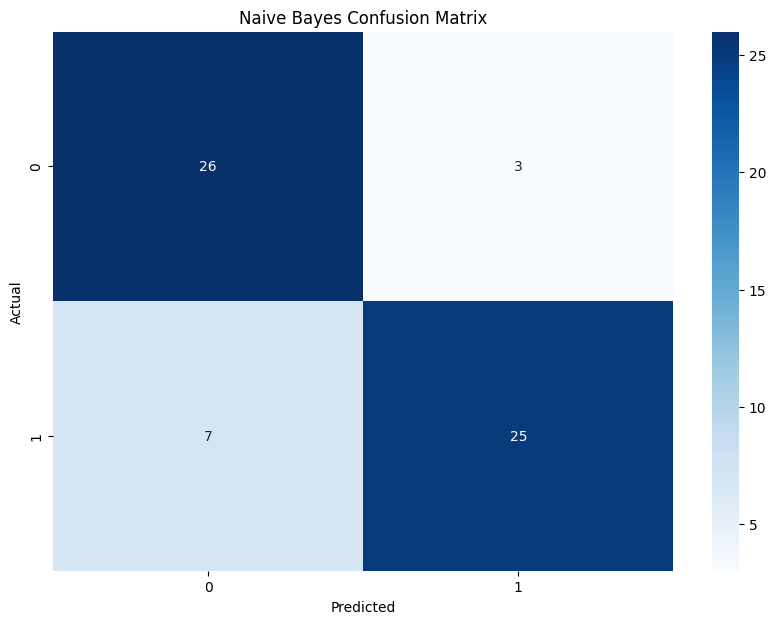

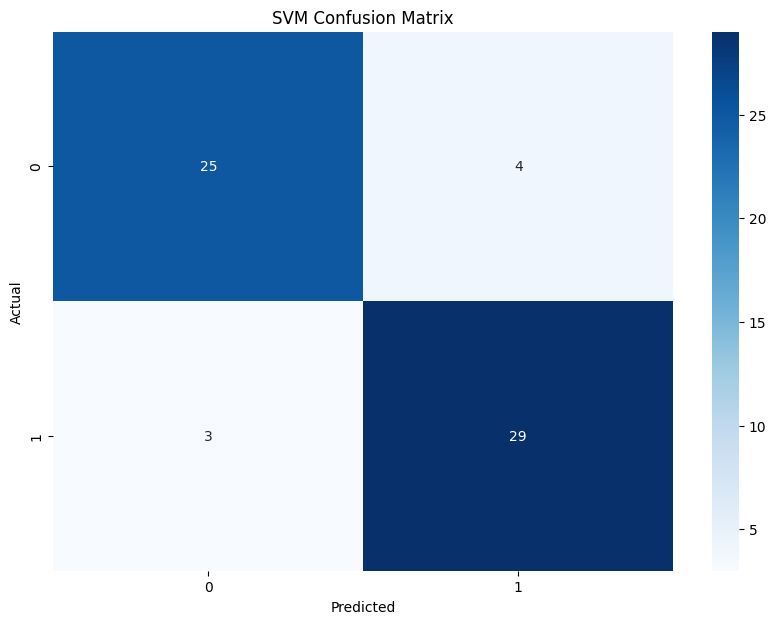

In [23]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_nb), "Naive Bayes Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), "SVM Confusion Matrix")

In [25]:
def predict_heart_disease(model, scaler, input_data):
  input_data_scaled=scaler.transform(np.array(input_data).reshape(1,-1))
  prediction=model.predict(input_data_scaled)
  return prediction[0]

In [26]:
print("Enter patient data: ")
def get_input(prompt, cast_type):
  while True:
    try:
      return cast_type(input(prompt))
    except ValueError:
      print(f"Invalid Input. Please enter a valid input{cast_type.__name__}")
age=float(input("Age: "))
sex=int(input("Sex(1=Male, 0=Female): "))
cp=int(input("Chest pain type(0-3): "))
restbp=float(input("Resting blood pressure(mm Hg): "))
chol=float(input("Serum cholestrol (mg/dl): "))
fbs=int(input("Fasting blood sugar>120 mg/dl(1=True, 0=False): "))
restecg=int(input("Resting electrocardiographic results(0-2): "))
thalach=float(input("Maximum heart rate achieved: "))
exang= int(input("Exercise induced angina(1=yes, 0=no): "))
oldpeak= float(input("ST depression induced by exercise relative to rest: "))
slope=int(input("Slope of the peak exercise ST segment(0-2): "))
ca=int(input("Number of major vessels colored by fluoroscopy(0-3): "))
thal=int(input("Thalassemia(1=normal, 2=fixed object, 3=reversible defect): "))
new_patient_data=[age, sex, cp, restbp, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

prediction=predict_heart_disease(svm_model, scalar, new_patient_data)
print("Prediction(1=A person has a heart disease , 0=A person is not diagnosed with any heart disease. ", prediction)


Enter patient data: 
Age: 51
Sex(1=Male, 0=Female): 0
Chest pain type(0-3): 2
Resting blood pressure(mm Hg): 155
Serum cholestrol (mg/dl): 245
Fasting blood sugar>120 mg/dl(1=True, 0=False): 0
Resting electrocardiographic results(0-2): 1
Maximum heart rate achieved: 162
Exercise induced angina(1=yes, 0=no): 1
ST depression induced by exercise relative to rest: 2.9
Slope of the peak exercise ST segment(0-2): 1
Number of major vessels colored by fluoroscopy(0-3): 2
Thalassemia(1=normal, 2=fixed object, 3=reversible defect): 2
Prediction(1=A person has a heart disease , 0=A person is not diagnosed with any heart disease.  1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
if prediction == 1:
    print("\nRecommendations for Heart Disease:")
    print("1. Consult a Cardiologist: Schedule an appointment with a cardiologist for a comprehensive evaluation and personalized treatment plan.")
    print("2. Medications: Depending on the severity and type of heart disease, medications may be prescribed to manage symptoms and prevent complications.")
    print("3. Lifestyle Changes:")
    print("   - Diet: Adopt a heart-healthy diet rich in fruits, vegetables, whole grains, lean proteins, and healthy fats.")
    print("   - Exercise: Engage in regular physical activity, such as walking, swimming, or cycling, for at least 30 minutes most days of the week.")
    print("   - Weight Management: Achieve and maintain a healthy weight through diet and exercise.")
    print("   - Quit Smoking: Seek help to quit smoking if you are a smoker.")
    print("   - Limit Alcohol Intake: Limit alcohol consumption to moderate levels.")
    print("4. Monitor Health: Regularly monitor blood pressure, cholesterol levels, and blood sugar levels if you have diabetes.")
    print("5. Stress Management: Practice stress-reducing techniques such as meditation, deep breathing exercises, yoga, or mindfulness.")
    print("6. Follow-up Care: Attend all scheduled follow-up appointments with your healthcare provider to monitor your condition and adjust treatment as necessary.")
else:
    print("\nNo heart disease detected. Continue to maintain a healthy lifestyle and follow up with your healthcare provider regularly.")


Recommendations for Heart Disease:
1. Consult a Cardiologist: Schedule an appointment with a cardiologist for a comprehensive evaluation and personalized treatment plan.
2. Medications: Depending on the severity and type of heart disease, medications may be prescribed to manage symptoms and prevent complications.
3. Lifestyle Changes:
   - Diet: Adopt a heart-healthy diet rich in fruits, vegetables, whole grains, lean proteins, and healthy fats.
   - Exercise: Engage in regular physical activity, such as walking, swimming, or cycling, for at least 30 minutes most days of the week.
   - Weight Management: Achieve and maintain a healthy weight through diet and exercise.
   - Quit Smoking: Seek help to quit smoking if you are a smoker.
   - Limit Alcohol Intake: Limit alcohol consumption to moderate levels.
4. Monitor Health: Regularly monitor blood pressure, cholesterol levels, and blood sugar levels if you have diabetes.
5. Stress Management: Practice stress-reducing techniques such as